# PCA algorithm

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/pca-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pca-data/pca_data.txt


In [2]:
data = np.loadtxt('/kaggle/input/pca-data/pca_data.txt')


In [3]:
data.shape

(1000, 500)

In [4]:
#standardize data 
mean_data = np.mean(data, axis=0)
data_standard = (data - mean_data) / np.std(data, axis=0) 
# data_standard = centered_data / np.std(data, axis=0)

# print(data_standard)

# print(np.max(data_standard))
# print(np.min(data_standard))
# print(np.max(mean_data))

In [5]:
covariance_matrix = np.cov(data_standard.T)
# print(covariance_matrix)

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [7]:
#sort the values
indice_sort = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indice_sort]
eigenvectors = eigenvectors[:,indice_sort]

In [8]:
top_two = eigenvectors[:,0:2]
# print(top_two)

In [9]:
projections = np.dot(data_standard, top_two)

<function matplotlib.pyplot.show(close=None, block=None)>

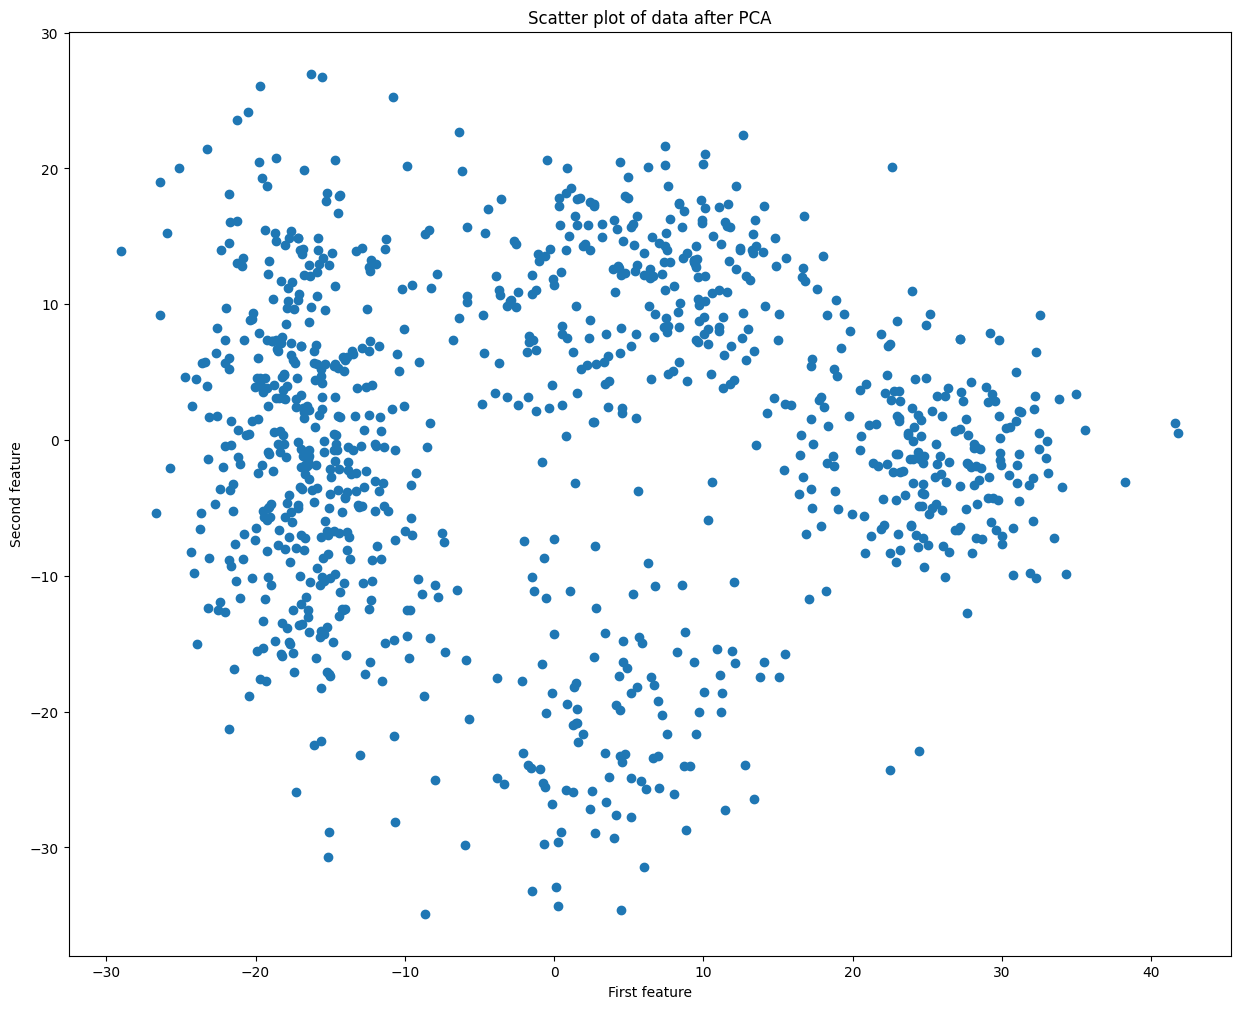

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
plt.scatter(projections[: , 0], projections[: , 1])
plt.title("Scatter plot of data after PCA")
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.show

In [11]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00


In [12]:
import umap
reducer = umap.UMAP(random_state=42)

umap_data = reducer.fit_transform(data)
umap_data.shape

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(1000, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

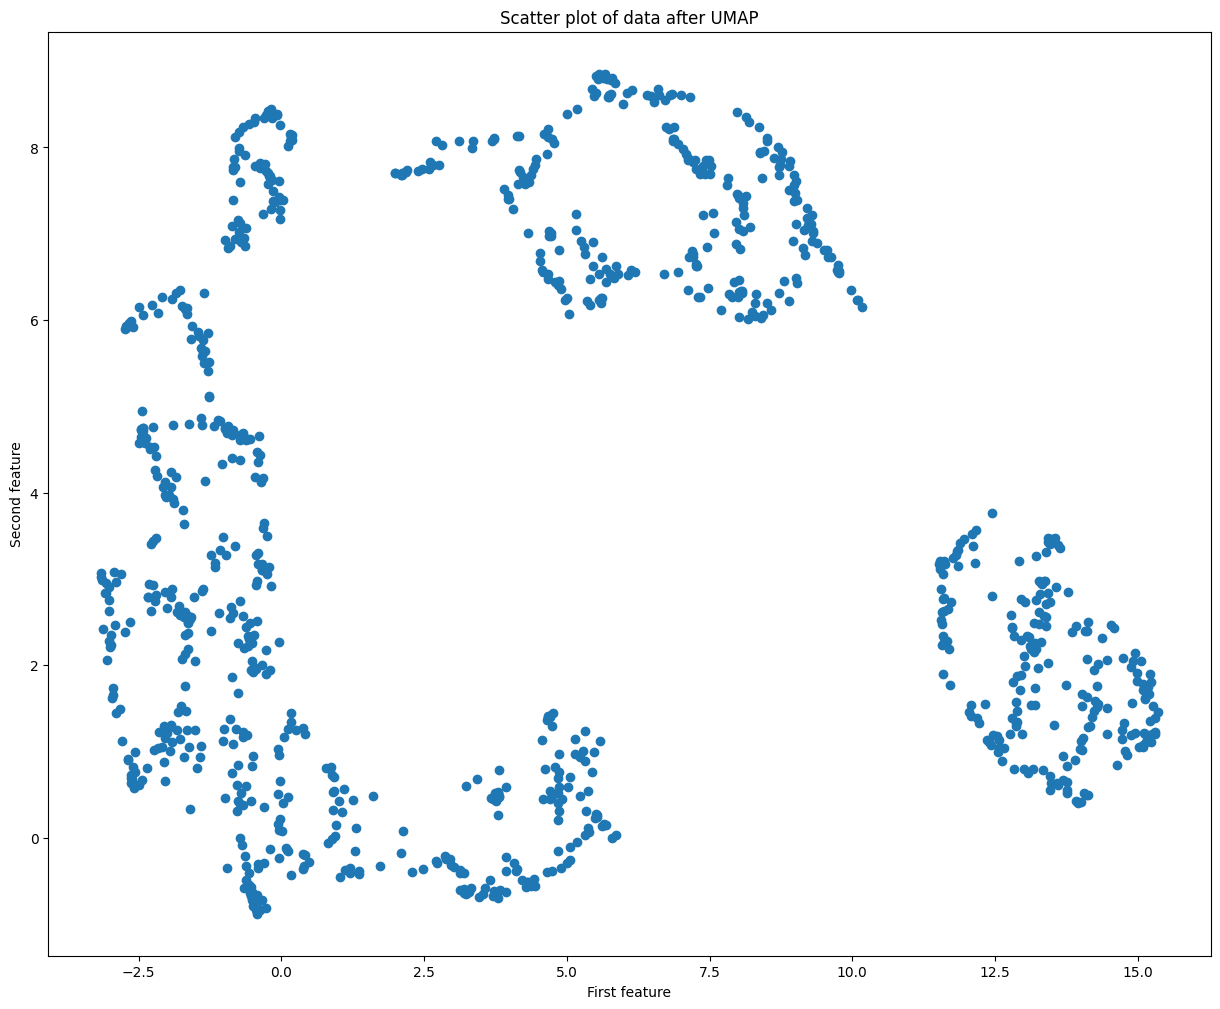

In [13]:
plt.figure(figsize=(15, 12))
plt.scatter(umap_data[: , 0], umap_data[: , 1])
plt.title("Scatter plot of data after UMAP")
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.show

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

tsne_data = tsne.fit_transform(data)
tsne_data.shape

(1000, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

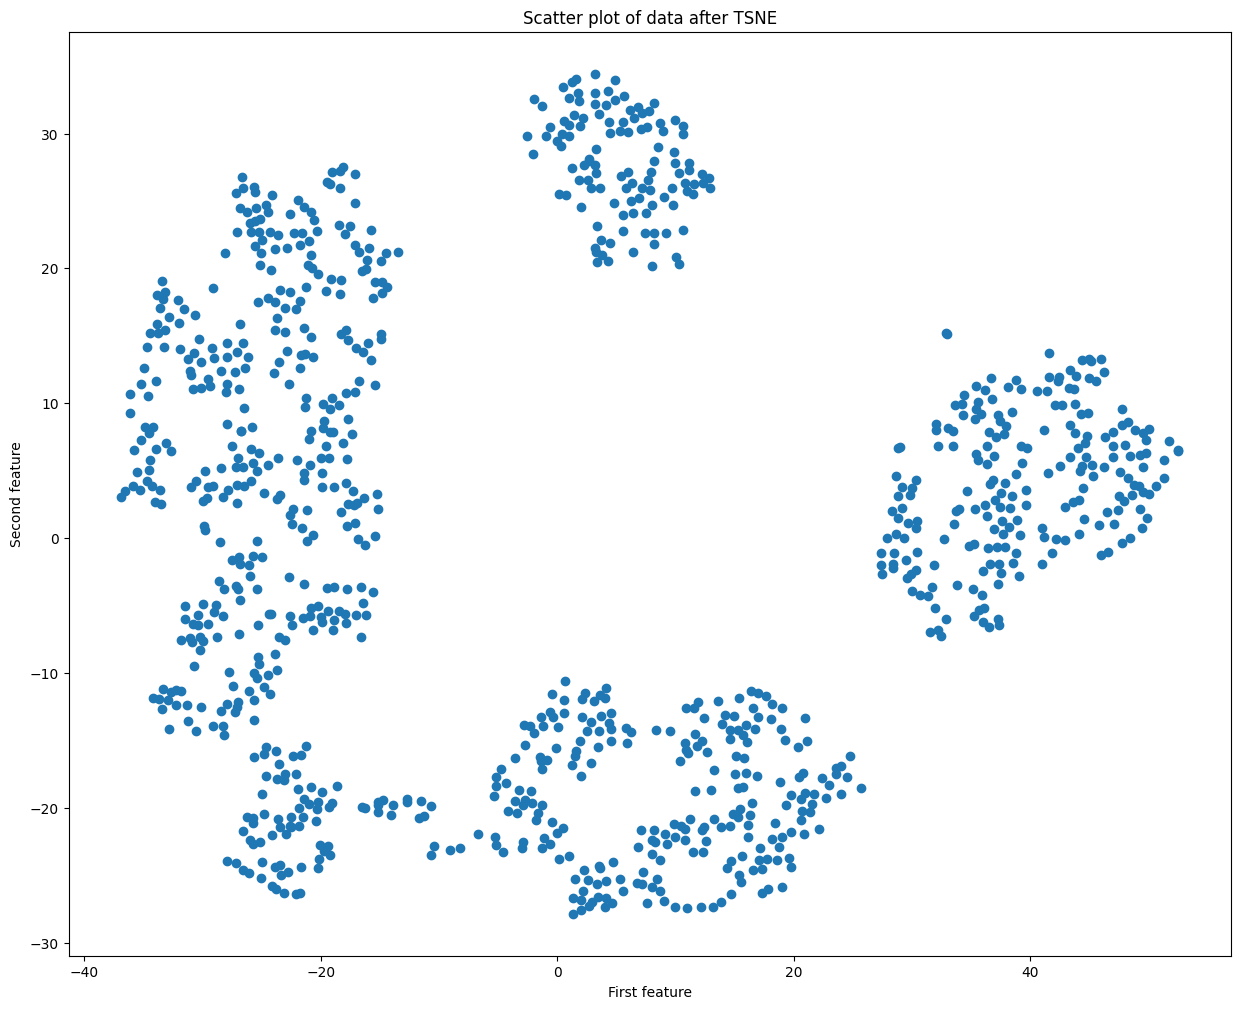

In [15]:
plt.figure(figsize=(15, 12))
plt.scatter(tsne_data[: , 0], tsne_data[: , 1])
plt.title("Scatter plot of data after TSNE")
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.show